In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# For this example, we'll use the digits dataset from sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images
y = digits.target

Shape of X: (1797, 8, 8)
Shape of y: (1797,)
Target label: 1


<Figure size 640x480 with 0 Axes>

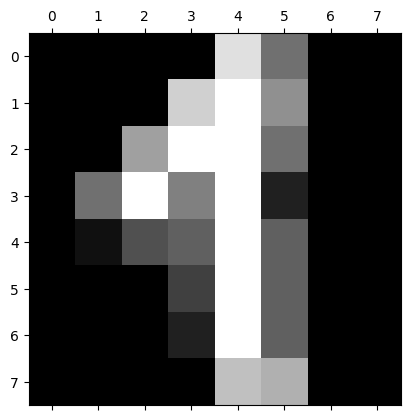

In [48]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

#Displaying and image from the dataset
plt.gray()
print(f"Target label: {digits.target[70]}")
plt.matshow(digits.images[70])
plt.show()

In [49]:
import cv2
import numpy as np

def extract_features(image):
    features = []

    # Original pixel values
    features.extend(image.flatten())

    # Canny edges
    edges = cv2.Canny(image.astype(np.uint8), 100, 200)
    features.extend(edges.flatten())

    # Moments
    moments = cv2.moments(image)
    features.extend(moments.values())

    # ORB keypoints count (single feature)
    orb = cv2.ORB_create()
    keypoints = orb.detect(image.astype(np.uint8), None)
    features.append(len(keypoints))

    return features



In [50]:
# Apply feature extraction to all images
X_features = np.array([extract_features(img) for img in X])

print(f"Shape of X_features: {X_features.shape}")

Shape of X_features: (1797, 153)


In [51]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
pcs = PCA(n_components=20)
X_train_pca = pcs.fit_transform(X_train)
X_test_pca = pcs.transform(X_test)

In [54]:
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:
# Initialize and train classifiers
logistic_regression = LogisticRegression(max_iter=10000)  # Increased max_iter
# evaluate_classifier(logistic_regression, X_train_pca, X_test_pca, y_train, y_test)
evaluate_classifier(logistic_regression,  X_train, X_test, y_train, y_test)

random_forest = RandomForestClassifier()
# evaluate_classifier(random_forest, X_train_pca, X_test_pca, y_train, y_test)
evaluate_classifier(random_forest, X_train, X_test, y_train, y_test)

svm = SVC()
# evaluate_classifier(svm, X_train_pca, X_test_pca, y_train, y_test)
evaluate_classifier(svm, X_train, X_test, y_train, y_test)

Accuracy: 0.975
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.93      0.97      0.95        40

    accuracy    

## **Note**

download kora lagbe na dataset

image feature - DIPF (Digital Image Processing Feature)

Cv2 library - open source computer vision library

canny edge + open cv moments

pca - principle component analysis
